# Gradient Descent implementation


- Here is the code that I implemented under the guidance of StatQuest's video (https://www.youtube.com/watch?v=sDv4f4s2SB8&t=578s)

- I used gemini to visualize the graph (mathplotlib) because I have yet to learn this libary.



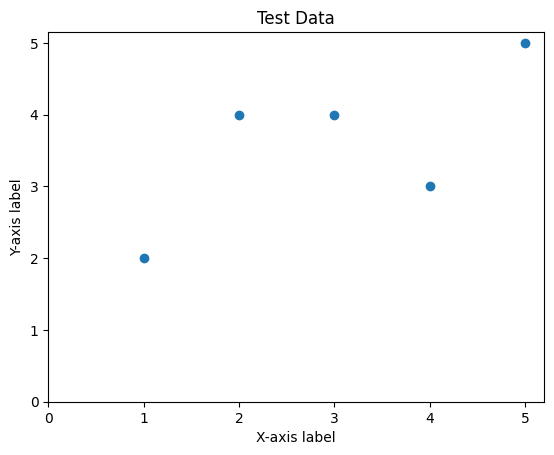

In [2]:

import matplotlib.pyplot as plt

x_test = [1, 2, 3, 4, 5]
y_test = [2, 4, 4, 3, 5]


plt.scatter(x_test, y_test)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Test Data")

plt.show()


## Loss Function

In [3]:
def loss(x, y, a, b):
  loss = 0
  for i in range(len(x)):
    y_predict = a * x[i] + b
    loss = loss +  (y_predict - y[i]) ** 2
  loss /= len(x)
  return loss



## Implement using brute-force

0.6000000000000002


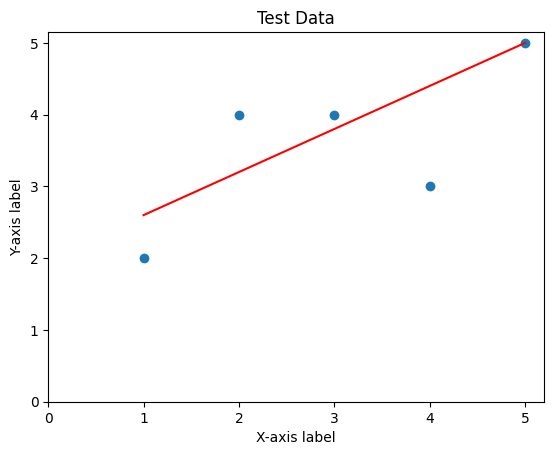

In [4]:
#brute-force
minloss = 1000
a_fin = 0.6
b_fin = 1
for i in range(-100, 100):
  for j in range(-100, 100):
    loss_value = loss(x_test, y_test, 0.6, j)
    if loss_value < minloss:
      minloss = loss_value
      a_fin = 0.6
      b_fin = j
print(minloss)
import matplotlib.pyplot as plt
import numpy as np


# Generate x values for the line
x_line = np.array(x_test)

y_line = a_fin * x_line + b_fin

# Plot the original scatter plot
plt.scatter(x_test, y_test)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Test Data")

# Plot the line
plt.plot(x_line, y_line, color='red')  # Plot the line in red

plt.show()


##Implement using Gradient descent to find **only** the intercept, with the solve setted to 0.6

1.79912109375
0.5600007724761962


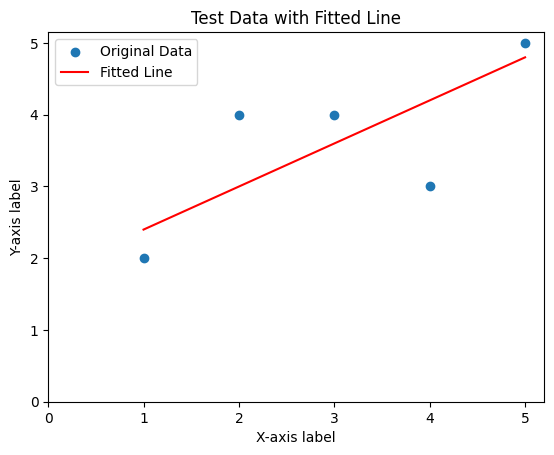

In [28]:
# standard deviation = (y - (a*x + b))^2
#                    = 2(y - (a*x + b)) * (-1)
# Gradient descent to find the intercept ( I used gemini to visualize cause I have no fricking idea how to use mathplotlib)
def gradient_descent():
  operations = 0
  learning_rate = 0.05
  intercept = 0

  while operations < 1000:
    operations += 1
    temp = 0
    for i in range(len(x_test)):
      temp += -2 * (y_test[i] - (x_test[i] * 0.6 + intercept))
    step_size = temp * learning_rate
    intercept = intercept - step_size
    if abs(step_size) < 0.001:
      break
  print(intercept)
  print(loss(x_test, y_test, 0.6, intercept))
gradient_descent()
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for gradient descent) ...

# Get the final intercept from gradient descent
final_intercept = intercept_history[-1]

# Generate x values for the line
x_line = np.array(x_test)

# Calculate y values for the line using the final intercept and slope (0.6)
y_line = 0.6 * x_line + final_intercept

# Plot the original scatter plot
plt.scatter(x_test, y_test, label='Original Data')

# Plot the fitted line
plt.plot(x_line, y_line, color='red', label='Fitted Line')

plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title("Test Data with Fitted Line")
plt.legend()
plt.show()

## Gradient descent to find both slope and intercept

0.5404072540650224


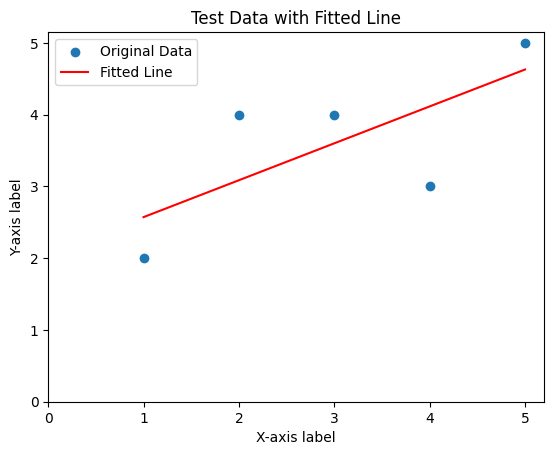

In [31]:
# deviation of intercept = -2(y - (slope*x + intercept))
#deviation of slope = -2 * x(y - (slope*x + intercept))
operations = 0
learning_rate = 0.005
intercept = 0
slope = 0
while operations <= 1000:
  operations += 1
  for i in range(len(x_test)):
    di = -2 * (y_test[i] - (slope * x_test[i] + intercept))
    ds = -2 * x_test[i] * (y_test[i] - (slope * x_test[i] + intercept))
    intercept = intercept - learning_rate * di
    slope = slope - learning_rate * ds

x_line = np.array(x_test)

# Calculate y values for the line using the final intercept and slope (0.6)
y_line = slope * x_line + intercept
print(loss(x_test, y_test, slope, intercept))
# Plot the original scatter plot
plt.scatter(x_test, y_test, label='Original Data')

# Plot the fitted line
plt.plot(x_line, y_line, color='red', label='Fitted Line')

plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title("Test Data with Fitted Line")
plt.legend()
plt.show()